# Dataset

In [1]:
# Libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Dataset
data=pd.read_csv('cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv')
data.head()

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293
1,69,150000,1991,40,110,1600,516.4348,346.767661
2,11,90000,1991,60,330,10000,2342.4545,3017.432333
3,26,100000,1991,60,200,8750,1392.3846,1598.662833
4,42,125000,1991,60,150,4600,1140.6429,1010.314138


In [3]:
data.shape

(1770, 8)

In [4]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 8 columns):
count       1770 non-null int64
km          1770 non-null int64
year        1770 non-null int64
powerPS     1770 non-null int64
minPrice    1770 non-null int64
maxPrice    1770 non-null int64
avgPrice    1770 non-null float64
sdPrice     1770 non-null float64
dtypes: float64(2), int64(6)
memory usage: 110.8 KB


In [5]:
# Zeros in dataset
data.isnull().sum()

count       0
km          0
year        0
powerPS     0
minPrice    0
maxPrice    0
avgPrice    0
sdPrice     0
dtype: int64

 # Graphics

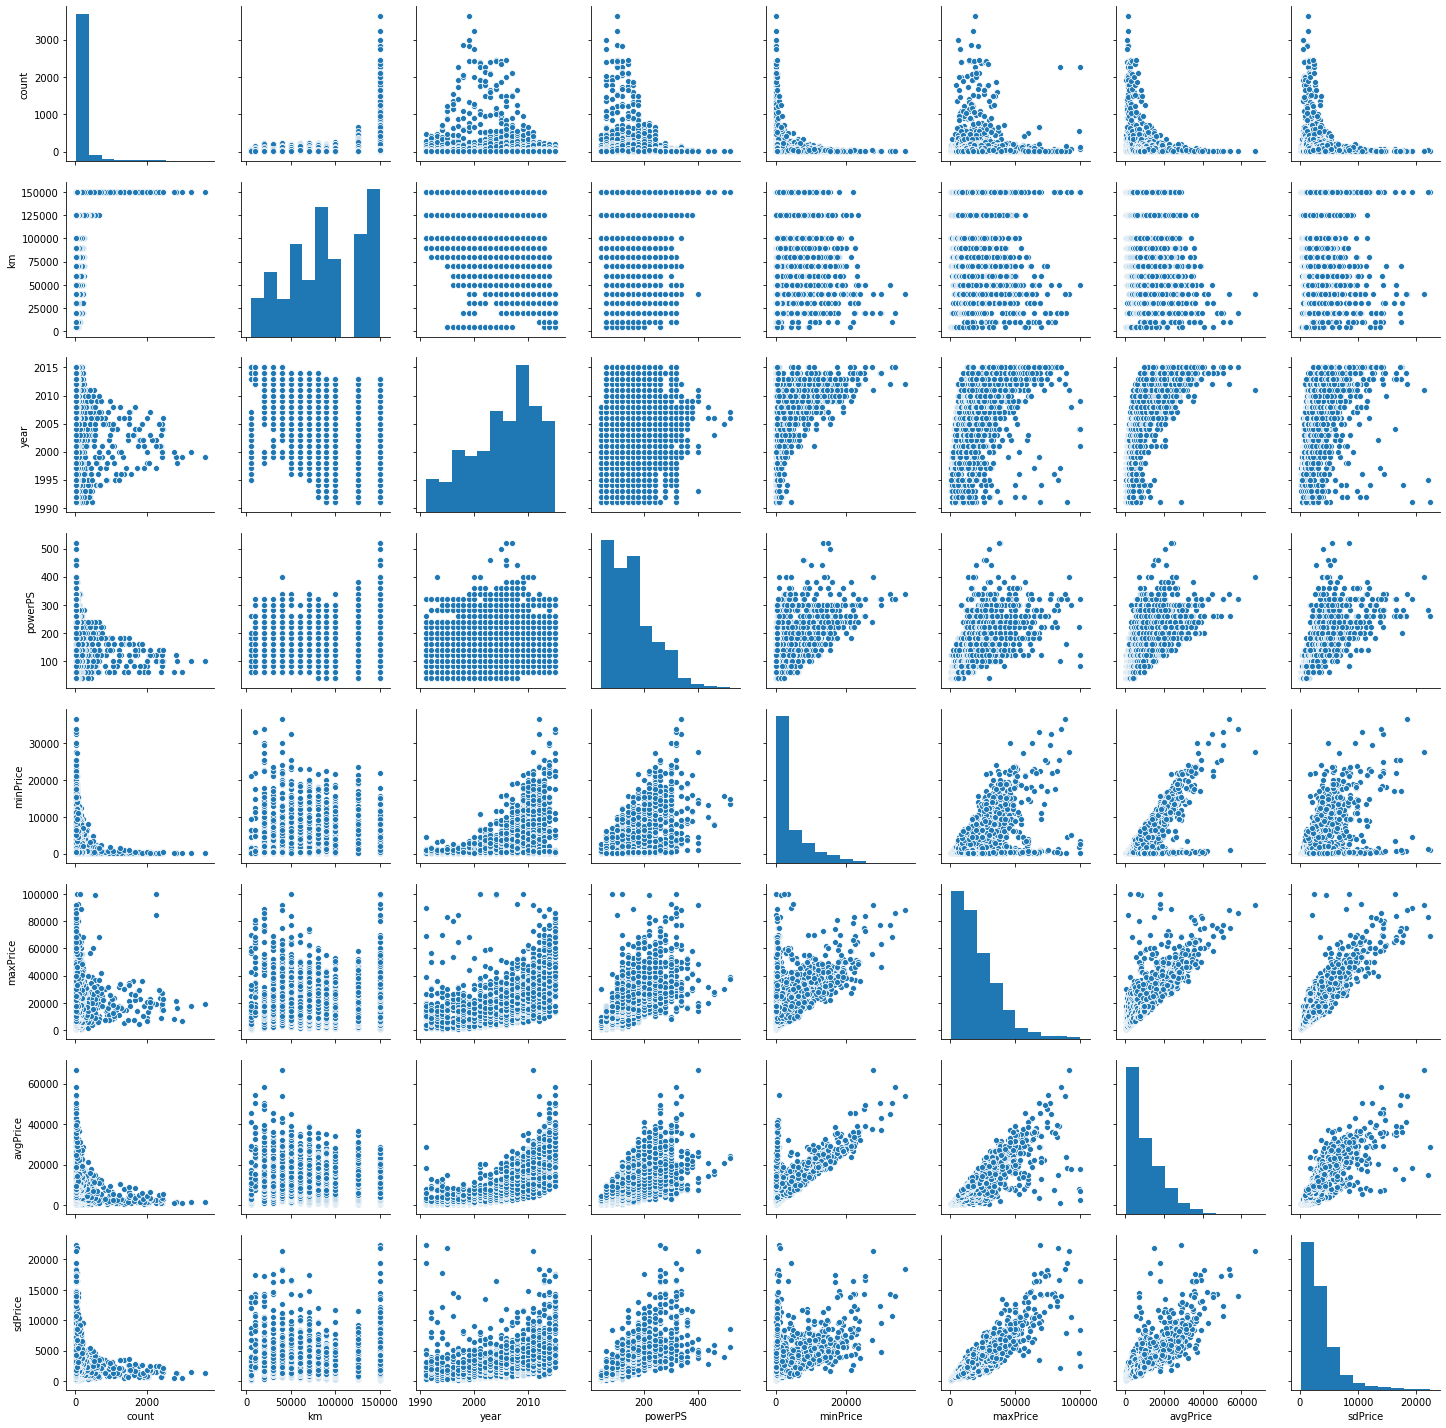

In [6]:
sns.pairplot(data);

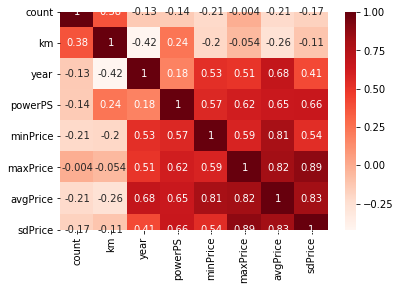

In [7]:
#Heatmap 1
corel = data.corr()
sns.heatmap(corel, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
data = data.drop('count', axis=1)
data = data.drop('sdPrice', axis=1)


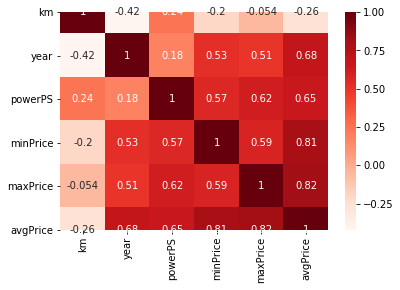

In [9]:
#Heatmap 2
corel = data.corr()
sns.heatmap(corel, annot=True, cmap=plt.cm.Reds)
plt.show()

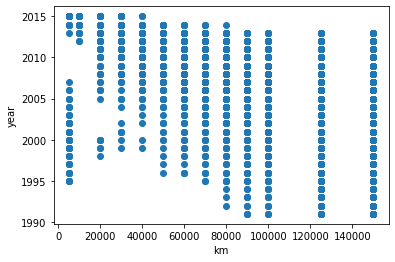

In [10]:
# Dependencies

plt.scatter(data['km'], data['year'])
plt.xlabel('km')
plt.ylabel('year')
plt.show()

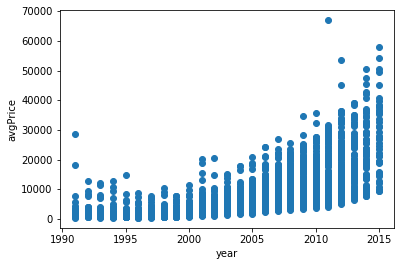

In [11]:
plt.scatter(data['year'], data['avgPrice'])
plt.xlabel('year')
plt.ylabel('avgPrice')
plt.show()

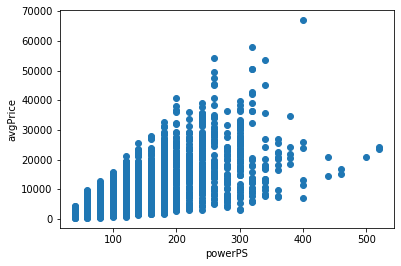

In [12]:
plt.scatter(data['powerPS'], data['avgPrice'])
plt.xlabel('powerPS')
plt.ylabel('avgPrice')
plt.show()

# --------------------------------------------------------------------------------------------------------------

In [13]:
y = data["avgPrice"]
X = data.drop('avgPrice', axis = 1)

In [14]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=12)
    return X_train, X_test, y_train, y_test

In [15]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X - набір нормалізованих характеристик
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [16]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [17]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    h_thetha = np.dot(X, theta)
    return h_thetha

In [18]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    J = 1/(2*m)*sum((hypothesis(X, theta) - y.values)**2)
    return J

In [19]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    d_thetha = np.dot(hypothesis(X, theta) - y.values, X)/m
    return d_thetha

In [20]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    theta - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [21]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(1416, 5), y=(1416,)
Test set: X=(354, 5), y=(354,)


In [22]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0, 0, 0, 0, 0])

In [23]:
y = y_train[:]

In [24]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (1416, 6)
y: (1416,)
94842378.01734284


In [25]:
alpha = 0.01
num_iters = 1500

In [26]:
derivative(X, y, theta)

array([-10408.26989032,   2244.3908378 ,  -6190.83947369,  -5927.22349266,
        -7266.31155339,  -7382.15860475])

In [27]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}; Theta 2: {}; Theta 3: {}; Theta 4: {}; Theta 5: {}'.format(new_theta[0], new_theta[1],new_theta[2], new_theta[3], new_theta[4], new_theta[5]))

Theta 0: 10408.266937957165; Theta 1: -1188.2972091748748; Theta 2: 2202.9449117874806; Theta 3: 2240.1737525748345; Theta 4: 2704.448781361257; Theta 5: 3295.235576642692


In [28]:
X_test_norm = (X_test - mean)/std
X_test_proc = prepare_X(X_test_norm)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

In [29]:
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

        y_actual        y_pred         err
1074  14239.4684  16945.857886   19.006254
326    1688.9308   1362.225014   19.343941
274    1997.0146   1745.776940   12.580662
1651  28537.0714  20001.737182   29.909636
226    2192.0558   4856.784301  121.562987
...          ...           ...         ...
230    4549.3243   8143.365820   79.001656
595    6120.7043   5404.772008   11.696894
1536  20630.3500  22747.512948   10.262370
1569   7046.2222   8963.301437   27.207192
1224   5867.8304   8103.410266   38.098918

[354 rows x 3 columns]
5593277.361030106



-------------------------------------------------------------------------------------------------------------------------------


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
rmse = mean_squared_error(y_test, y_test_pred)**0.5
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

In [32]:
print('Linear Regression')
print('RMSE   : ', rmse)
print('MSE    : ', mse)
print('MAE    : ', mae)

Linear Regression
RMSE   :  3344.6307302989694
MSE    :  11186554.722060217
MAE    :  2010.249894940329



-------------------------------------------------------------------------------------------------------------------------------


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_test_predd = regressor.predict(X_test) # test dataset results(pred)

In [34]:
rmse2 = mean_squared_error(y_test, y_test_predd)**0.5
mse2 = mean_squared_error(y_test, y_test_predd)
mae2 = mean_absolute_error(y_test, y_test_predd)

In [35]:
print('Linear Regression sklearn')
print('RMSE   : ', rmse2)
print('MSE    : ', mse2)
print('MAE    : ', mae2)

Linear Regression sklearn
RMSE   :  3344.333548001487
MSE    :  11184566.880288213
MAE    :  2009.8239142342422
